## Support Vector Machines 
- SVMs are particularly effective in cases where the data is not linearly separable by finding an optimal hyperplane that maximally seperates the classes or approximates the regression function.
- In classification, SVMs aim to find a decision boundary that maximizes the margin between different classes. The decision boundary is constructed by selecting a subset of training examples called support vectors which are the closest points to the margin,

In [1]:
import pandas as pd 
from sklearn.datasets import load_iris

iris = load_iris()

In [2]:
iris.feature_names


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
df['target'] = iris.target

In [7]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])

In [9]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [10]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:150]

##### Sepal length vs Sepal Width (Setosa vs Versicolor)

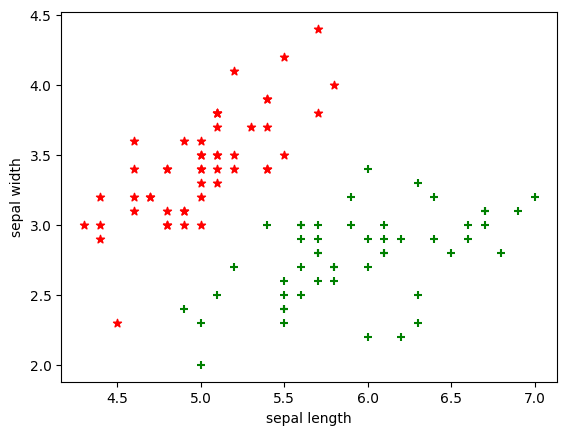

In [11]:
import matplotlib.pyplot as plt 
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color='red', marker='*')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='green', marker='+')

### Train using SVM 

In [12]:
from sklearn.model_selection import train_test_split
X = df.drop(['target', 'flower_name'], axis=1)
y = df.target


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [14]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)

SVC()

In [16]:
model.score(X_test, y_test)

0.9666666666666667

### Tune Parameters

### 1. Regularization 
- 'C' parameter controls the regularization strength or the trade-off between maximazing the margin and minimizing the misclassifications.
- a smaller 'C' value allows a larger margin but may result in more misclassfication.
- a larget 'C' value aims to minimize misclassification but may lead to a smaller margin  

In [17]:
model_C = SVC(C=1)
model_C.fit(X_train, y_train)
model.score(X_test, y_test)

0.9666666666666667

In [21]:
model_C = SVC(C=10)
model_C.fit(X_train, y_train)
model.score(X_test, y_test)

0.9666666666666667

### 2. Gamma
- it defines the influence of a single training example and affects the shape of the decision boundary. 
- A higher 'gamma' value leads to a complex decision boundary, potentialy resulting in overfitting.
- a lower 'gamma' value smoothens the decision boundary 

In [22]:
model_g = SVC(gamma=10)
model_g.fit(X_train, y_train)
model_g.score(X_test, y_test)

0.9666666666666667

In [23]:
model_g = SVC(gamma='auto')
model_g.fit(X_train, y_train)
model_g.score(X_test, y_test)

0.9666666666666667

### 3. Kernel 
- specifies the kernel function to be used for mapping the input data into higher-dimensional feature spaces. 
- some common kernel options ae 'linear', 'poly', 'rbf'- ` radial basis function `

In [26]:
model_k = SVC(kernel='linear')
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9666666666666667

In [27]:
model_k = SVC(kernel='rbf')
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9666666666666667

# Exercise

##### Train SVM classifier using sklearn digits dataset (i.e. from sklearn.datasets import load_digits) and then,

1. Measure accuracy of your model using different kernels such as rbf and linear.
2. Tune your model further using regularization and gamma parameters and try to come up with highest accurancy score
3. Use 80% of samples as training data size

In [28]:
from sklearn.datasets import load_digits
digits = load_digits()


In [29]:
df = pd.DataFrame(digits.data)

In [30]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [31]:
X = digits.data
y = digits.target

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [34]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)

SVC()

In [35]:
model.score(X_test, y_test)

0.9777777777777777

In [36]:
model = SVC(kernel='linear', gamma=10, C=10)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9722222222222222